# Data Visualization for VRDK

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Controller Point Data

In [2]:
controller_point_data = pd.read_csv("testid_ControllerPointData.csv")

In [3]:
controller_point_data

,ID,ObjectName,LeftControlPoint,RightControlPoint,PrimaryIndexTrigger,PrimaryHandTrigger,SecondaryIndexTrigger,SecondaryHandTrigger,IsMarked,InterInit,InterEnd,ObjXInit,ObjXEnd,ObjYInit,ObjYEnd,ObjZInit,ObjZEnd
0,testid,Floor,0,1,0,0,0,0,0,18.87355,18.90741,0.0,0.0,0.0,0.0,0.0,0.0
1,testid,Capsule,0,1,0,0,0,0,0,18.90741,20.60544,2.7,2.7,1.5,1.5,2.7,2.7
2,testid,Floor,0,1,0,0,0,0,0,20.60544,20.93467,0.0,0.0,0.0,0.0,0.0,0.0
3,testid,Floor,0,1,0,0,0,0,0,21.96625,22.38869,0.0,0.0,0.0,0.0,0.0,0.0
4,testid,Sphere,0,1,0,0,0,0,0,22.69221,23.78401,-2.7,-2.7,1.5,1.5,2.7,2.7
5,testid,Floor,0,1,0,0,0,0,0,23.84353,24.16076,0.0,0.0,0.0,0.0,0.0,0.0
6,testid,Floor,0,1,0,0,0,0,0,26.92585,27.44922,0.0,0.0,0.0,0.0,0.0,0.0
7,testid,Floor,0,1,0,0,0,0,0,27.71851,28.21209,0.0,0.0,0.0,0.0,0.0,0.0
8,testid,Floor,0,1,0,0,0,0,0,30.65030,31.18449,0.0,0.0,0.0,0.0,0.0,0.0
9,testid,Cube,0,1,0,0,0,0,0,31.70742,31.80505,-2.7,-2.7,1.5,1.5,-2.7,-2.7


## Controller Position Data

In [4]:
controller_position_data = pd.read_csv("testid_ControllerPositionData.csv")

In [5]:
controller_position_data

,ID,Hand,XPos,YPos,ZPos,Time
0,testid,Right,0.246181,1.311223,0.348793,17.27197
1,testid,Left,-0.200838,1.044289,0.318137,17.31369
2,testid,Right,0.246410,1.308194,0.350046,17.31369
3,testid,Left,-0.200758,1.044340,0.318388,17.34778
4,testid,Right,0.245652,1.306052,0.350649,17.34778
...,...,...,...,...,...,...
1204,testid,Right,0.214685,0.854558,1.047979,42.12812
1205,testid,Left,0.174550,0.851985,0.986042,42.21892
1206,testid,Right,0.214457,0.854526,1.048158,42.21892
1207,testid,Left,0.174550,0.851985,0.986042,42.27327


## Gaze Data

In [6]:
gaze_data = pd.read_csv("testid_Gaze.csv")

In [7]:
gaze_data

,ID,ObjectName,Start,End
0,testid,Sphere,22.26699,25.98271
1,testid,Capsule,26.53872,26.63146
2,testid,Cylinder,26.96823,27.06832
3,testid,Cylinder,27.58919,29.75522
4,testid,Cube,31.06439,33.74408
5,testid,Sphere,34.19236,38.03461
6,testid,Sphere,38.30516,38.99427


In [8]:
# Create a map that holds object name and start and end time as tuples
ID = gaze_data["ID"][0]
objects = gaze_data["ObjectName"]
start_times = gaze_data["Start"]
end_times = gaze_data["End"]
gaze_data_time_map = {}

for idx in range(0, len(objects)):
    if objects[idx] not in gaze_data_time_map.keys():
        new_list = []
        new_list.append((start_times[idx], end_times[idx]))
        gaze_data_time_map[objects[idx]] = new_list
    else:
        gaze_data_time_map[objects[idx]].append((start_times[idx], end_times[idx]))
        

print(gaze_data_time_map)

{'Sphere': [(22.26699, 25.98271), (34.19236, 38.03461), (38.30516, 38.99427)], 'Capsule': [(26.53872, 26.631459999999997)], 'Cylinder': [(26.96823, 27.06832), (27.589190000000002, 29.75522)], 'Cube': [(31.064390000000003, 33.74408)]}


In [9]:
# Find appropriate statistical measures and display results

for k, v in gaze_data_time_map.items():
    # Print Object Name
    print(k + ": ")
    
    # Print total number of times the subject looked at the object.
    num_look_at = len(v)
    print("Total number of times subject " + ID + " looked at " + k + " is " + str(num_look_at) + " times.")
    
    # Print average length of time the subject looked at the object.
    avg_time_look_at = 0
    
    for start_end in v:
        avg_time_look_at += (start_end[1] - start_end[0])
        
    avg_time_look_at /= len(v)
    print("Average length of time subject " + ID + " looked at " + k + " is " + str(avg_time_look_at) + " seconds.")
    
    
    # Print shorest and longest fixation period of time
    stare_lengths = []
    
    for start_end in v:
        stare_lengths.append(start_end[1] - start_end[0])
        
    shortest_fixation = min(stare_lengths)
    longest_fixation = max(stare_lengths)
    print("Shortest length of time subject " + ID + " looked at " + k + " is " + str(shortest_fixation) + " seconds.")
    print("Longest length of time subject " + ID + " looked at " + k + " is " + str(longest_fixation) + " seconds.")
    
    print()

Sphere: 
Total number of times subject testid looked at Sphere is 3 times.
Average length of time subject testid looked at Sphere is 2.749026666666667 seconds.
Shortest length of time subject testid looked at Sphere is 0.6891099999999994 seconds.
Longest length of time subject testid looked at Sphere is 3.84225 seconds.

Capsule: 
Total number of times subject testid looked at Capsule is 1 times.
Average length of time subject testid looked at Capsule is 0.0927399999999956 seconds.
Shortest length of time subject testid looked at Capsule is 0.0927399999999956 seconds.
Longest length of time subject testid looked at Capsule is 0.0927399999999956 seconds.

Cylinder: 
Total number of times subject testid looked at Cylinder is 2 times.
Average length of time subject testid looked at Cylinder is 1.1330600000000004 seconds.
Shortest length of time subject testid looked at Cylinder is 0.10009000000000157 seconds.
Longest length of time subject testid looked at Cylinder is 2.1660299999999992 s

## Player Position Data

In [17]:
player_position_data = pd.read_csv("testid_PlayerPosition.csv")

In [18]:
player_position_data

,UserID,Time,XPos,ZPos
0,testid,17.49965,-0.000057,-0.000083
1,testid,17.70991,-0.000057,-0.000083
2,testid,17.92022,-0.000057,-0.000083
3,testid,18.14269,-0.000057,-0.000083
4,testid,18.35365,-0.000057,-0.000083
...,...,...,...,...
107,testid,41.26190,-2.526474,0.737224
108,testid,41.48435,-2.526477,0.737203
109,testid,41.72932,-2.526479,0.737169
110,testid,41.97407,-2.526482,0.737139


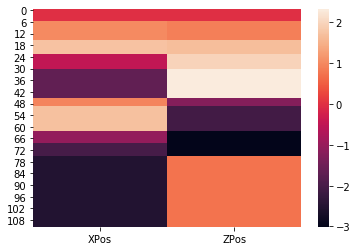

In [25]:
position_data = pd.concat([player_position_data['XPos'], player_position_data['ZPos']], axis=1, keys=['XPos', 'ZPos'])
sns.heatmap(position_data)

In [ ]:
# End of File